In [71]:
import os
os.chdir('/Users/francopiccolo/GitHub/learn-to-rank')

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

properties = pd.read_csv('./data/properties.csv')
reviews = pd.read_csv('./data/reviews.csv')
queries = pd.read_csv('./data/queries.csv')
interactions = pd.read_csv('./data/interactions.csv')

In [6]:
properties.head()

,property_id,city_id,country_id,property_type,distance_to_center
0,2696,2559,148,3,0.1
1,5489,5199,108,1,2.3
2,21081,290,154,1,0.4
3,4108,2559,148,1,1.3
4,21578,5492,83,1,1.1


In [10]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21202 entries, 0 to 21201
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         21202 non-null  int64  
 1   city_id             21202 non-null  int64  
 2   country_id          21202 non-null  int64  
 3   property_type       21202 non-null  int64  
 4   distance_to_center  21202 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 828.3 KB


<AxesSubplot:>

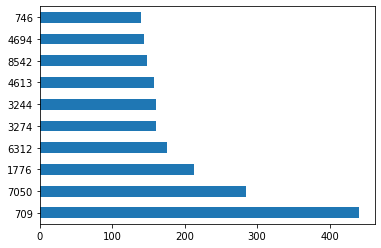

In [76]:
properties['city_id'].value_counts().iloc[:10].plot(kind='barh')

In [7]:
reviews.head()

,property_id,date_stayed,age_group,trip_type,security_score,location_score,staff_score,fun_score,cleanliness_score,value_for_money_score,facilities_score
0,15563,2019-06-12,18-24,REGULARVACATION,4,5,4,5,3,5,4
1,15074,2019-06-04,18-24,OTHER,5,5,5,5,4,5,5
2,21078,2019-10-26,18-24,WEEKENDAWAY,3,5,5,4,4,4,4
3,12179,2019-10-20,18-24,GAPYEAR,5,5,5,5,5,5,5
4,21314,2019-10-26,31-40,REGULARVACATION,3,4,3,3,2,4,2


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649055 entries, 0 to 649054
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   property_id            649055 non-null  int64 
 1   date_stayed            649055 non-null  object
 2   age_group              649055 non-null  object
 3   trip_type              649055 non-null  object
 4   security_score         649055 non-null  int64 
 5   location_score         649055 non-null  int64 
 6   staff_score            649055 non-null  int64 
 7   fun_score              649055 non-null  int64 
 8   cleanliness_score      649055 non-null  int64 
 9   value_for_money_score  649055 non-null  int64 
 10  facilities_score       649055 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 54.5+ MB


In [19]:
reviews.describe()

,property_id,security_score,location_score,staff_score,fun_score,cleanliness_score,value_for_money_score,facilities_score
count,649055.000000,649055.000000,649055.000000,649055.000000,649055.000000,649055.000000,649055.000000,649055.000000
mean,14197.759255,4.498087,4.528877,4.503826,4.230138,4.312527,4.371408,4.234660
std,5641.663602,0.822245,0.768957,0.871220,1.004749,0.994968,0.918060,0.999786
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9656.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,14925.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,19252.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,21864.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [22]:
reviews['age_group'].unique()

array(['18-24', '31-40', '25-30', 'Over41'], dtype=object)

<AxesSubplot:>

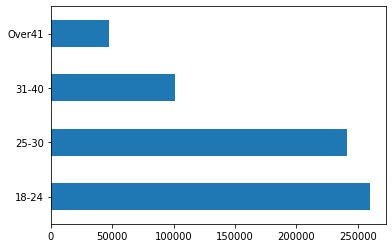

In [30]:
reviews['age_group'].value_counts().plot(kind='barh')

In [21]:
reviews.trip_type.unique()

array(['REGULARVACATION', 'OTHER', 'WEEKENDAWAY', 'GAPYEAR', 'Other',
       'Weekend Away', 'Gap Year', 'RTWTRIP', 'COLLEGEBREAK',
       'Regular Vacation', 'RTW Trip', 'College Break', 'ANNUALVACATION',
       'BACKPACK', 'SHORTGETAWAY', 'STUDENTHOLIDAY', 'BACKPACK,CULTURE',
       'BUSINESS', 'CULTURE', 'CITY', 'TRIPAROUNDWORLD',
       'BACKPACK,CITY,CULTURE', 'CITY,CULTURE', 'FAMILY',
       'CITY,FAMILY,CULTURE', 'BACKPACK,CULTURE,OUTDOOR',
       'BACKPACK,BEACH,CITY,PARTY,CULTURE,OUTDOOR',
       'BACKPACK,BEACH,PARTY', 'BUSINESS,CITY', 'PARTY,CULTURE,WORK',
       'CULTURE,OUTDOOR,WORK', 'BEACH', 'BACKPACK,CITY', 'CULTURE,WORK',
       'WORK', 'BACKPACK,OUTDOOR', 'CITY,PARTY,CULTURE', 'BACKPACK,BEACH',
       'BACKPACK,BEACH,CITY,FESTIVAL,CULTURE,OUTDOOR,FRIENDS',
       'BACKPACK,BEACH,CULTURE', 'BACKPACK,PARTY,CULTURE,WORK',
       'BACKPACK,CITY,FESTIVAL,PARTY,CULTURE', 'BEACH,WORK',
       'CULTURE,OUTDOOR', 'BACKPACK,BEACH,CULTURE,OUTDOOR',
       'BACKPACK,CITY,PARTY,RE

<AxesSubplot:>

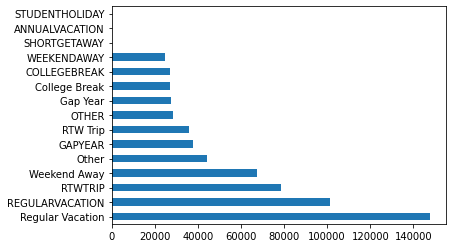

In [36]:
reviews['trip_type'].value_counts().iloc[:15].plot(kind='barh')

In [8]:
queries.head()

,query_id,device_type,language,checkin_date,checkout_date,nr_guests,city_id,date_time
0,109397,desktop,english,2019-12-28,2019-12-31,2,4583,2019-12-17 21:41:34
1,109572,desktop,english,2020-01-05,2020-01-07,6,4799,2019-12-14 08:07:37
2,109484,desktop,other,2020-01-22,2020-01-23,1,5560,2019-12-17 15:12:09
3,109365,mobile,english,2019-12-26,2019-12-28,1,3518,2019-12-22 20:44:31
4,94059,mobile,english,2020-01-07,2020-01-08,2,364,2019-12-27 09:25:56


In [13]:
queries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   query_id       500000 non-null  int64 
 1   device_type    500000 non-null  object
 2   language       500000 non-null  object
 3   checkin_date   500000 non-null  object
 4   checkout_date  500000 non-null  object
 5   nr_guests      500000 non-null  int64 
 6   city_id        500000 non-null  int64 
 7   date_time      500000 non-null  object
dtypes: int64(3), object(5)
memory usage: 30.5+ MB


In [45]:
queries['date_time'].min(), queries['date_time'].max()

('2019-12-01 00:00:00', '2019-12-31 23:59:58')

<AxesSubplot:xlabel='day'>

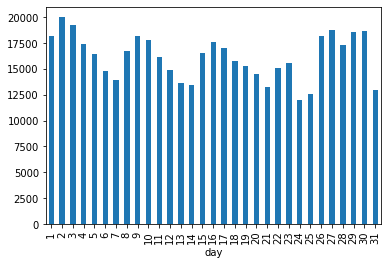

In [53]:
queries['day'] = pd.to_datetime(queries['date_time']).dt.day
queries.groupby('day').size().plot(kind='bar')

<AxesSubplot:>

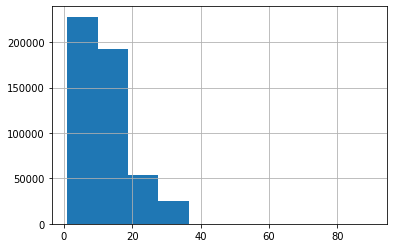

In [64]:
query_sizes_df = interactions.groupby('query_id').size().reset_index().rename({0: 'size'}, axis=1)
query_sizes_df['size'][query_sizes_df['size'] < 100].hist()

<AxesSubplot:>

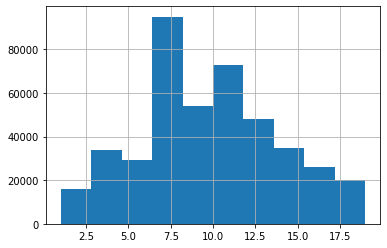

In [66]:
query_sizes_df['size'][query_sizes_df['size'] < 20].hist()

<AxesSubplot:title={'center':'size'}, xlabel='device_type'>

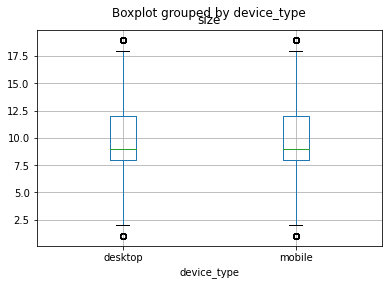

In [70]:
query_sizes_df[query_sizes_df['size'] < 20].merge(queries).boxplot(column='size', by='device_type')

In [37]:
queries['language'].unique()

array(['english', 'other', 'spanish', 'french', 'german'], dtype=object)

<AxesSubplot:>

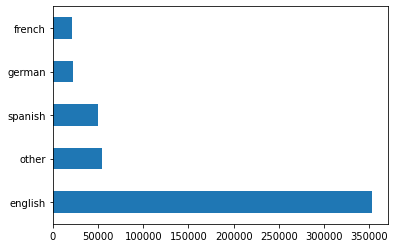

In [39]:
queries['language'].value_counts().plot(kind='barh')

In [9]:
interactions.head()

,query_id,property_id,position,interaction,dorm_price,private_price
0,29136,20789,7,CLICK,NaN,20.2
1,29136,11183,5,VIEW,NaN,6.3
2,29125,21590,12,VIEW,25.0,25.3
3,29125,15553,7,VIEW,15.9,24.0
4,29130,8990,7,VIEW,NaN,15.8


In [14]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976498 entries, 0 to 5976497
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   query_id       int64  
 1   property_id    int64  
 2   position       int64  
 3   interaction    object 
 4   dorm_price     float64
 5   private_price  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 273.6+ MB


In [40]:
interactions['interaction'].unique()

array(['CLICK', 'VIEW', 'BOOKING'], dtype=object)

<AxesSubplot:>

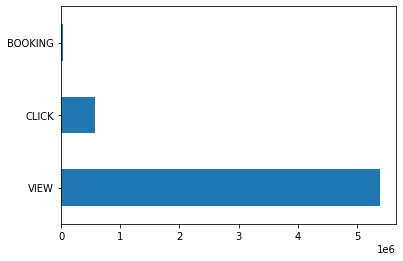

In [41]:
interactions['interaction'].value_counts().plot(kind='barh')

In [42]:
interactions['interaction'].value_counts()/len(interactions)

VIEW       0.901031
CLICK      0.094922
BOOKING    0.004047
Name: interaction, dtype: float64

In [ ]:
# Resources
# lightgbm docs: https://lightgbm.readthedocs.io/en/latest/
# nDCG: https://www.youtube.com/watch?v=qG0wUgsEugw
# theory + lightgbm: https://mlexplained.com/2019/05/27/learning-to-rank-explained-with-code/
# ranking as classification: https://towardsdatascience.com/learning-to-rank-with-python-scikit-learn-327a5cfd81f
# lightgbm example: https://medium.com/@tacucumides/learning-to-rank-with-lightgbm-code-example-in-python-843bd7b44574
# metrics: https://medium.com/swlh/rank-aware-recsys-evaluation-metrics-5191bba16832
# metrics: https://stats.stackexchange.com/questions/159657/metrics-for-evaluating-ranking-algorithms
# lecture on metrics: https://www.youtube.com/playlist?list=PLBv09BD7ez_6nqE9YU9bQXpjJ5jJ1Kgr9
# paper: https://www.microsoft.com/en-us/research/publication/from-ranknet-to-lambdarank-to-lambdamart-an-overview/
# NN based: https://dec0de.me/2014/10/learning-to-rank-1
# https://prof.beuth-hochschule.de/fileadmin/prof/aloeser/shuaib_ltr_places_defence.pdf
# https://everdark.github.io/k9/notebooks/ml/learning_to_rank/learning_to_rank.html
# https://programmersought.com/article/41434702285/

# Hours log
# Saturday 15 - 20 = 5
# Sunday 13 - 21 = 8
# Friday 16 - 21 = 5
# Total 18hs